In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [3]:
TC = pd.read_csv("ToyotaCorolla.csv", encoding='ANSI')
TC.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [9]:
TC2=TC[['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']].head()

In [10]:
TC2

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [11]:
TC2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          5 non-null      int64
 1   Age_08_04      5 non-null      int64
 2   KM             5 non-null      int64
 3   HP             5 non-null      int64
 4   cc             5 non-null      int64
 5   Doors          5 non-null      int64
 6   Gears          5 non-null      int64
 7   Quarterly_Tax  5 non-null      int64
 8   Weight         5 non-null      int64
dtypes: int64(9)
memory usage: 488.0 bytes


In [12]:
TC2.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [13]:
TC2.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,0.190436,-0.093527,NaN,NaN,NaN,NaN,NaN,-0.227466
Age_08_04,0.190436,1.000000,-0.565308,NaN,NaN,NaN,NaN,NaN,0.909718
KM,-0.093527,-0.565308,1.000000,NaN,NaN,NaN,NaN,NaN,-0.457478
HP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Doors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quarterly_Tax,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weight,-0.227466,0.909718,-0.457478,NaN,NaN,NaN,NaN,NaN,1.000000


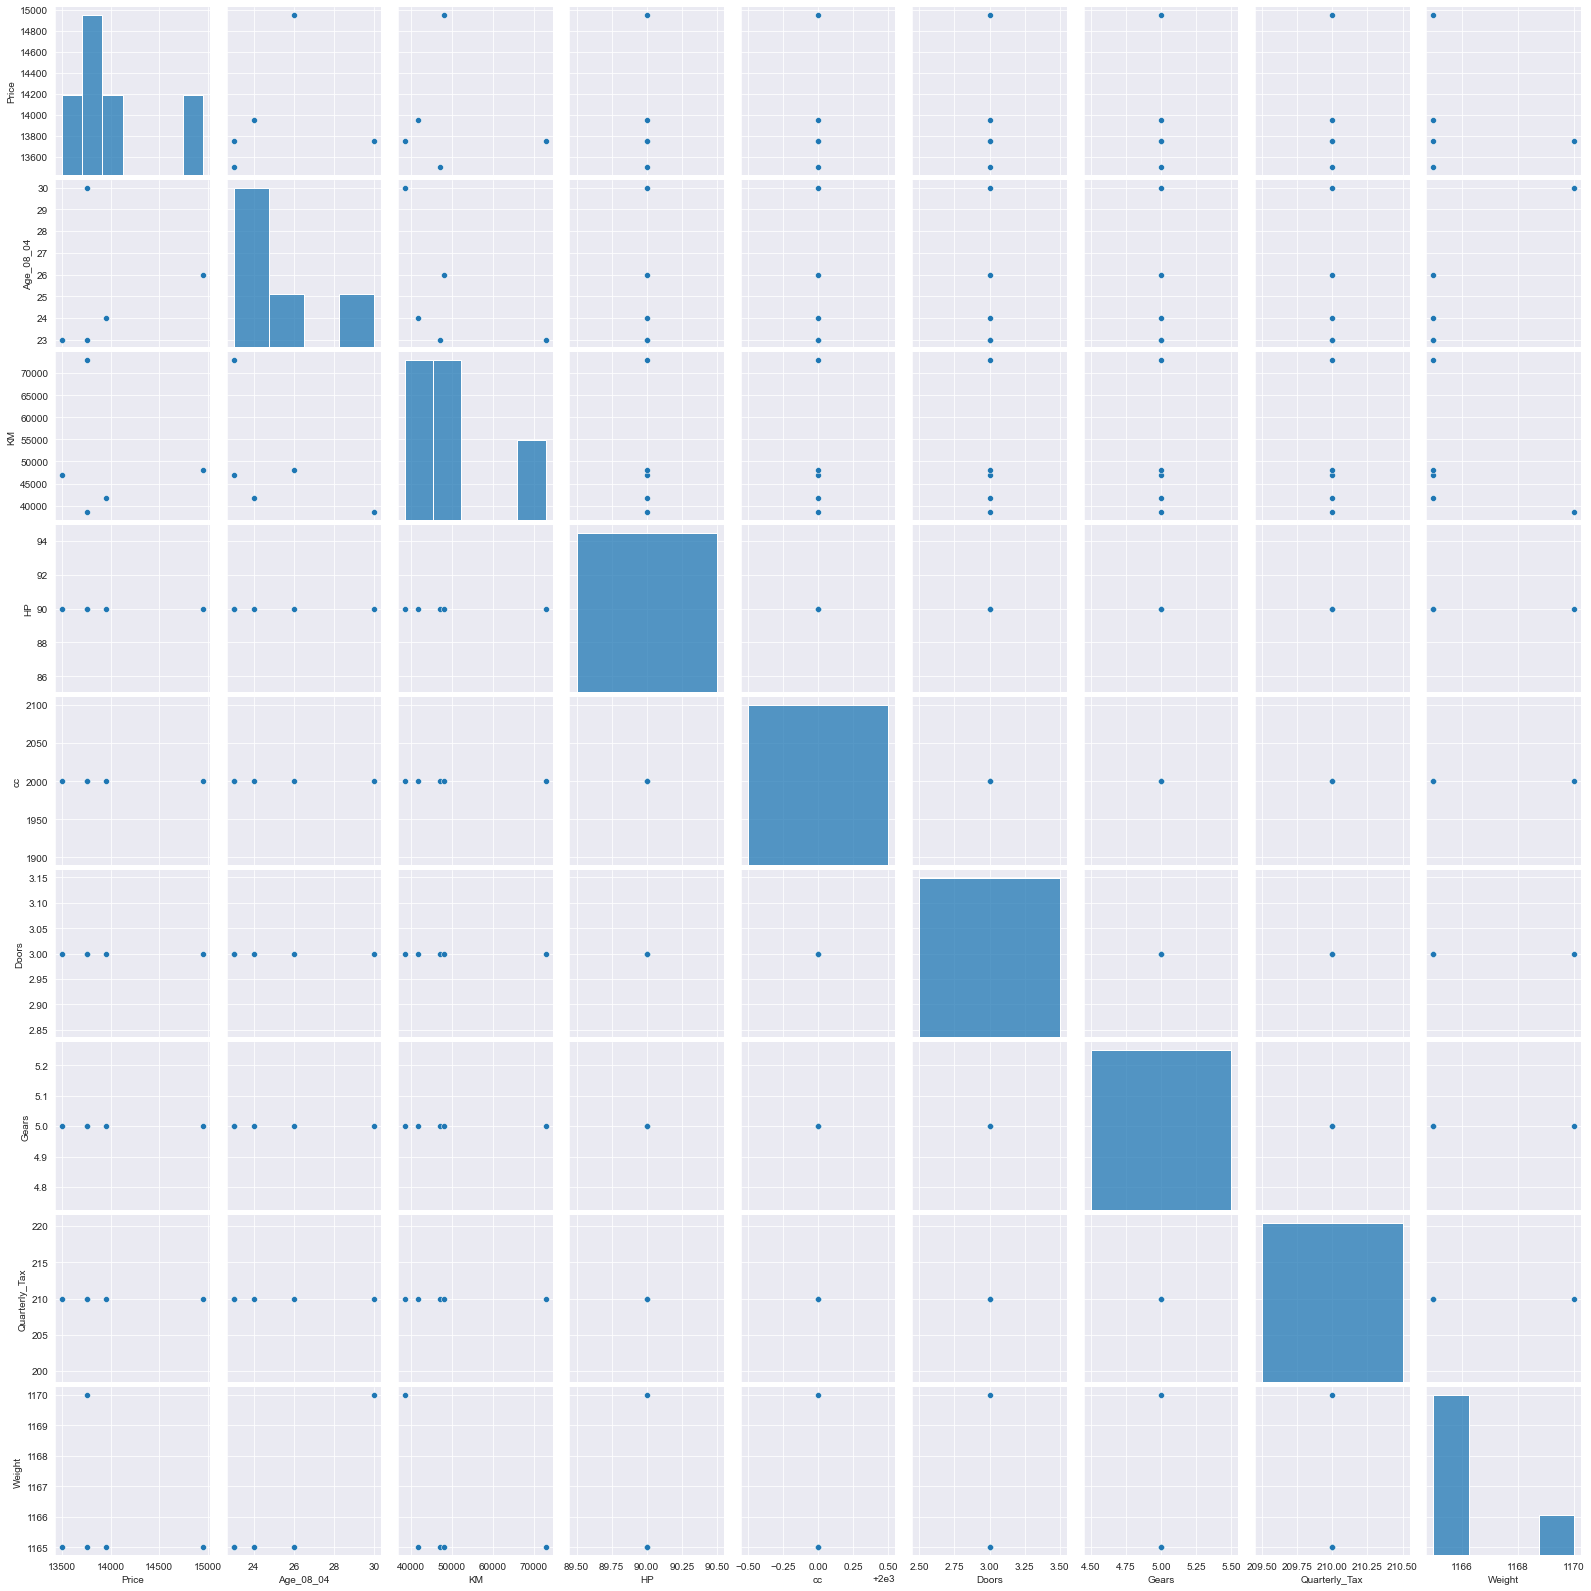

In [14]:
sns.set_style(style='darkgrid')
sns.pairplot(TC2)

In [15]:
import statsmodels.formula.api as smf 
model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=TC2).fit()
model.summary()

C:\Users\SmartLine\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     1919.
Date:                Sat, 08 May 2021   Prob (F-statistic):             0.0168
Time:                        11:17:06   Log-Likelihood:                -16.578
No. Observations:                   5   AIC:                             41.16
Df Residuals:                       1   BIC:                             39.59
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.1747      0.002     75.850      0.008       0.145       0.204
Age_08_04       478.2693      6.649     71.927      0.009     393.782     562.757
KM                0.0092      0.001     13.629      0.047       0.001       0.018
HP               15.7232      0.207     75.850      0.008      13.089      18.357
cc              349.4053      4.607     75.850      0.008     290.874     407.936
Doors             0.5241      0.007     75.850      0.008       0.436       0.612
Gears             0.8735      0.012     75.850      0.008       0.727       1.020
Quarterly_Tax    36.6876      0.484     75.850      0.008      30.542      42.833
Weight         -605.8869      8.136    -74.466      0.009    -709.270    -502.504
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.916
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.193
Skew:                           0.236   Prob(JB):                        0.908
Kurtosis:                       2.161   Cond. No.                     1.62e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The input rank is higher than the number of observations.
[3] The smallest eigenvalue is 4.97e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [16]:
new_data=pd.DataFrame({'Age_08_04':25,"KM":30000,"HP":102,"cc":1600,"Doors":4,"Gears":5,"Quarterly_Tax":100,"Weight":1120},index=[1])

In [18]:
model.predict(new_data)

1   -102033.566423
dtype: float64

In [20]:
model.predict(TC2.iloc[0:5,])

0    13509.451475
1    13747.684738
2    13939.295679
3    14953.568107
4    13750.000000
dtype: float64

In [21]:
pred_y = model.predict(TC2)

In [22]:
pred_y

0    13509.451475
1    13747.684738
2    13939.295679
3    14953.568107
4    13750.000000
dtype: float64